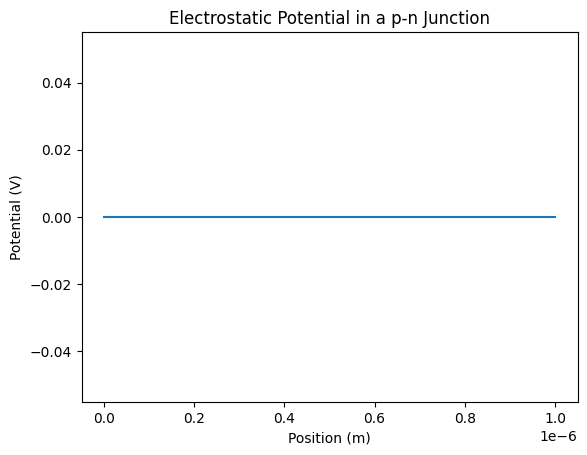

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import k, epsilon_0
#from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup

# Constants
T = 300  # Temperature in Kelvin
q = 1.602176634e-19
V_T = k*T/q  # Thermal voltage
epsilon_si = 11.7 * epsilon_0  # Dielectric constant of silicon

# Doping concentrations
N_A = 1e15  # Acceptor concentration (p-type)
N_D = 1e16  # Donor concentration (n-type)

# Define grid
L = 1e-6  # Length of the device
N = 100  # Number of grid points
x = np.linspace(0, L, N)
dx = x[1] - x[0]

# Initial potential guess
phi = np.zeros(N)

# Poisson solver (simple relaxation method)
def poisson_solver(phi, rho, epsilon, dx, tol=1e-6, max_iter=10):
    for _ in range(max_iter):
        phi_new = np.copy(phi)
        phi_new[1:-1] = 0.5 * (phi[:-2] + phi[2:] - dx**2 * rho[1:-1] / epsilon)
        
        # Convergence check
        if np.linalg.norm(phi_new - phi) < tol:
            break
        
        phi = phi_new

    return phi

# Charge density (assuming complete ionization)
rho = q * (N_D - N_A) * np.ones(N)  # Make rho an array

# Boundary conditions
phi[0] = 0  # Example boundary condition
phi[-1] = 0

# Solve Poisson’s equation
phi = poisson_solver(phi, rho, epsilon_si, dx)

# Plot the results
plt.plot(x, phi)
plt.xlabel("Position (m)")
plt.ylabel("Potential (V)")
plt.title("Electrostatic Potential in a p-n Junction")
plt.show()
